<h1> <center> Heart Failure Prediction</center> </h1>

<a id="top"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:gray; border:0' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

* [1. Introduction](#1)
* [2. Data analysis and Visualization](#2)
* [3. Data transformations](#3)
* [4. Modeling](#4)
* [5. Conclusion](#5)

<a id="1"></a>
<h2 style='background:gray; border:0; color:white'><center>1. Introduction<center><h2>

The present work was intended to analyze some data related to people's health. So known that cardiovascular diseases(CVDs) are the number 1 cause of death globally, and heart failure is a common event caused by CVDs, the  <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data"><strong>Heart Failure Prediction</strong></a> dataset was chosen.

Assuming most cardiovascular diseases preventeble by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity using population-wide strategies. People with cardiovascular disease or who are at high cardiovascular risk need early detection and management.

In that way, machine learning models can help to the early risk identifcation. So, in the flolowing sections we will take a look to the data, making a initial analysis and quick visualization. Futher some transformation was made to make the data more presentable to the modeling process. Finaly, a model was created to detect the heart failure. In the end a short conclusion was made, where can be helpful for the strategies taken to prevent the heart failure.

It is important to remember this is a Notebook to study purposes only.

This notebook was created by [Matheus Gama Costa](https://www.linkedin.com/in/matheus-gama-costa-903456a6/). I hope you find this Notebook useful. Feel free to contact me if you have any questions!

<a id="2"></a>
<h2 style='background:gray; border:0; color:white'><center>2. Data analysis and Visualization<center><h2>

### First of all the libraries will be imported. Here we have all the libraries used in the code. They were included as they were needed during the work progress

In [92]:
# Importing the libraries

# data handling
import numpy as np 
import pandas as pd

# data visualization
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### Here we are going to import the dataset and do a quick overview in the available variables.

In [91]:
# Importing the dataset
dataset = pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')

# shown the columns names
print(dataset.columns)

# shown the first 5 rows
dataset.head()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Let's see if any columns have NaNs values

In [4]:
print('Number of Nan value for each column:')
for col in dataset.columns:
    print(col,'=', dataset[col].isnull().sum())

Number of Nan value for each column:
age = 0
anaemia = 0
creatinine_phosphokinase = 0
diabetes = 0
ejection_fraction = 0
high_blood_pressure = 0
platelets = 0
serum_creatinine = 0
serum_sodium = 0
sex = 0
smoking = 0
time = 0
DEATH_EVENT = 0


A quick statistical description of the data

In [5]:
# Analyzing the data
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Till here we were able to see that the dataset has only numerical data. This is good for mathematical approaches or statistical usage of the data. To our aim, this is good because will facilitate the data usage in the machine learning approach. For other data analyzes approaches and visualization this is also can be a good thing.
### Another good thing to be analyzed is that we do not have missing values.

### Now we will take a look at some distributions of the data.

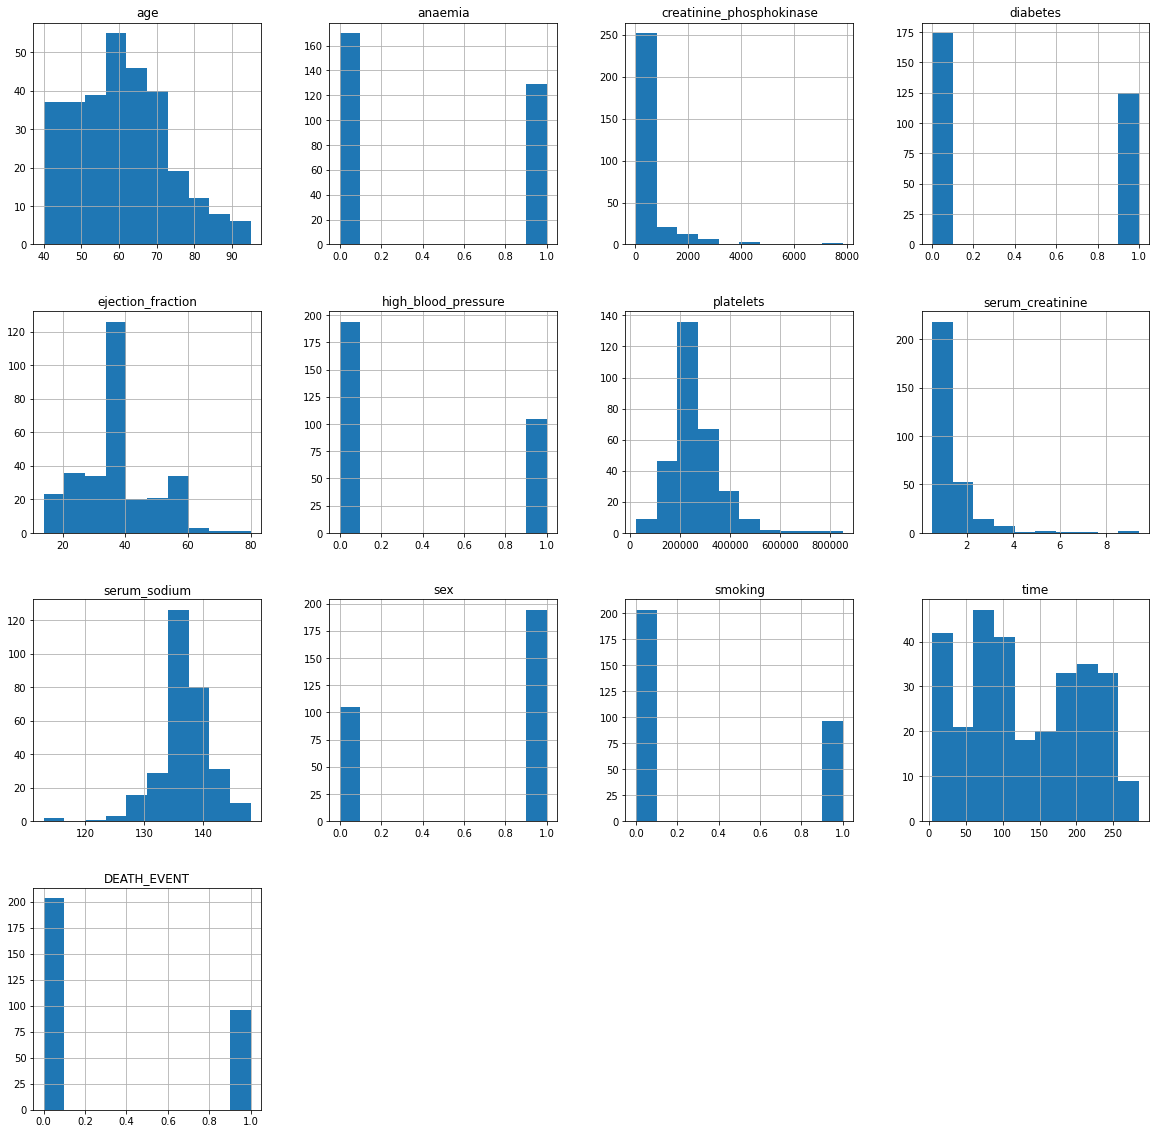

In [14]:
# histogram plot for all dataset
dataset.hist(figsize=(20,20));

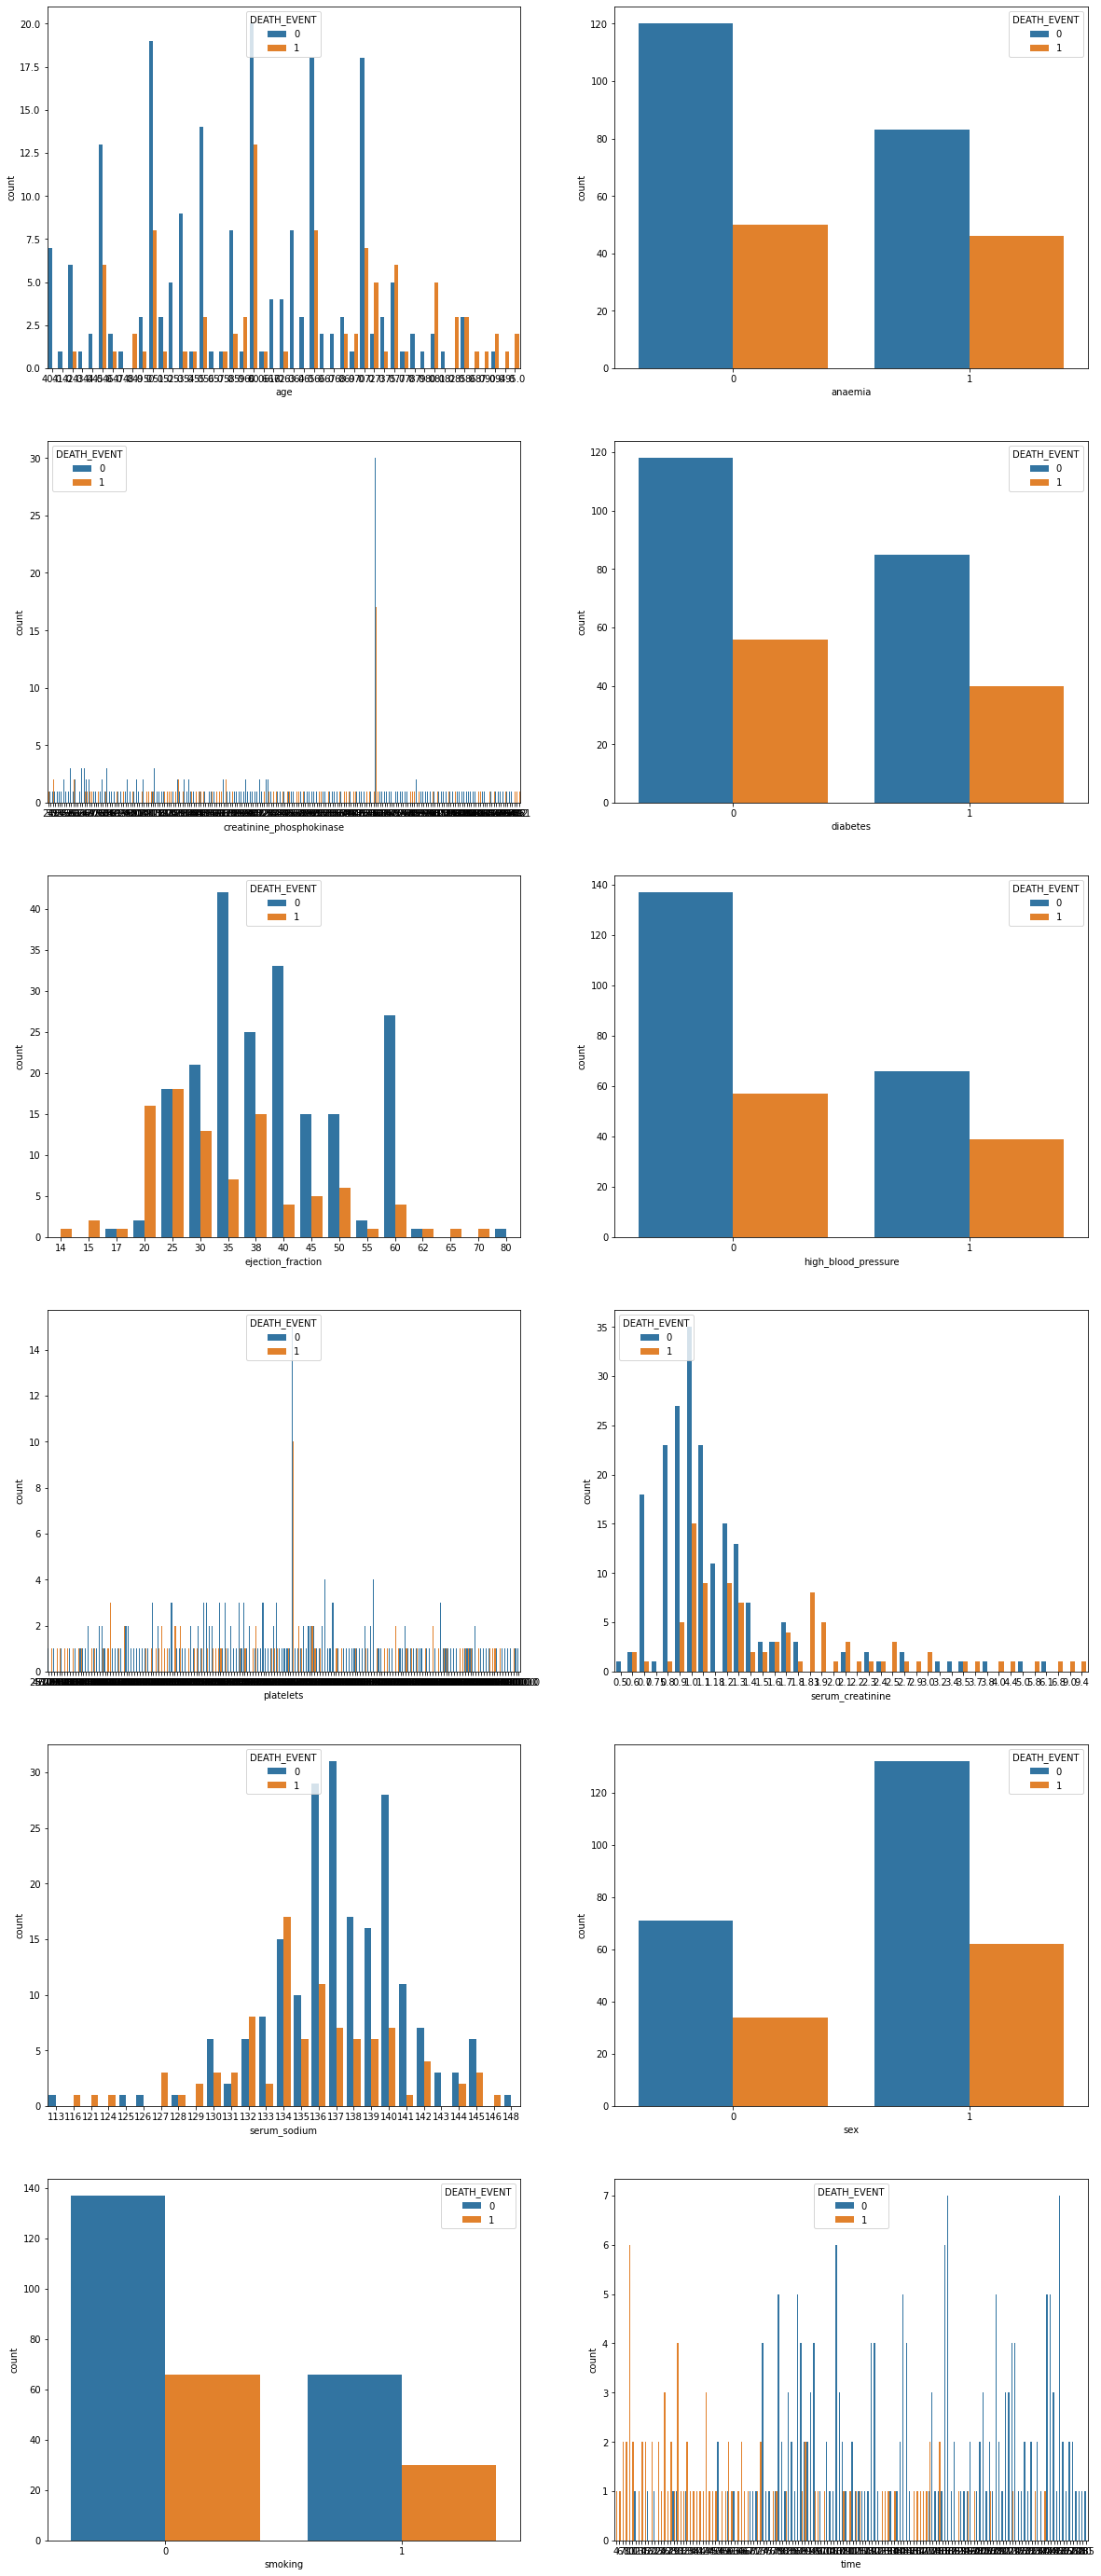

In [48]:
# counter plot for all data concerning death events
fig, ((axis1, axis2), (axis3, axis4), 
      (axis5, axis6), (axis7, axis8), 
      (axis9, axis10), (axis11, axis12)) = plt.subplots(6,2, figsize=(20,50))

sns.countplot(x='age', hue='DEATH_EVENT', data=dataset, ax=axis1)
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=dataset, ax=axis2)
sns.countplot(x='creatinine_phosphokinase', hue='DEATH_EVENT', data=dataset, ax=axis3);
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=dataset, ax=axis4)
sns.countplot(x='ejection_fraction', hue='DEATH_EVENT', data=dataset, ax=axis5)
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=dataset, ax=axis6);
sns.countplot(x='platelets', hue='DEATH_EVENT', data=dataset, ax=axis7)
sns.countplot(x='serum_creatinine', hue='DEATH_EVENT', data=dataset, ax=axis8)
sns.countplot(x='serum_sodium', hue='DEATH_EVENT', data=dataset, ax=axis9);
sns.countplot(x='sex', hue='DEATH_EVENT', data=dataset, ax=axis10)
sns.countplot(x='smoking', hue='DEATH_EVENT', data=dataset, ax=axis11)
sns.countplot(x='time', hue='DEATH_EVENT', data=dataset, ax=axis12);

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


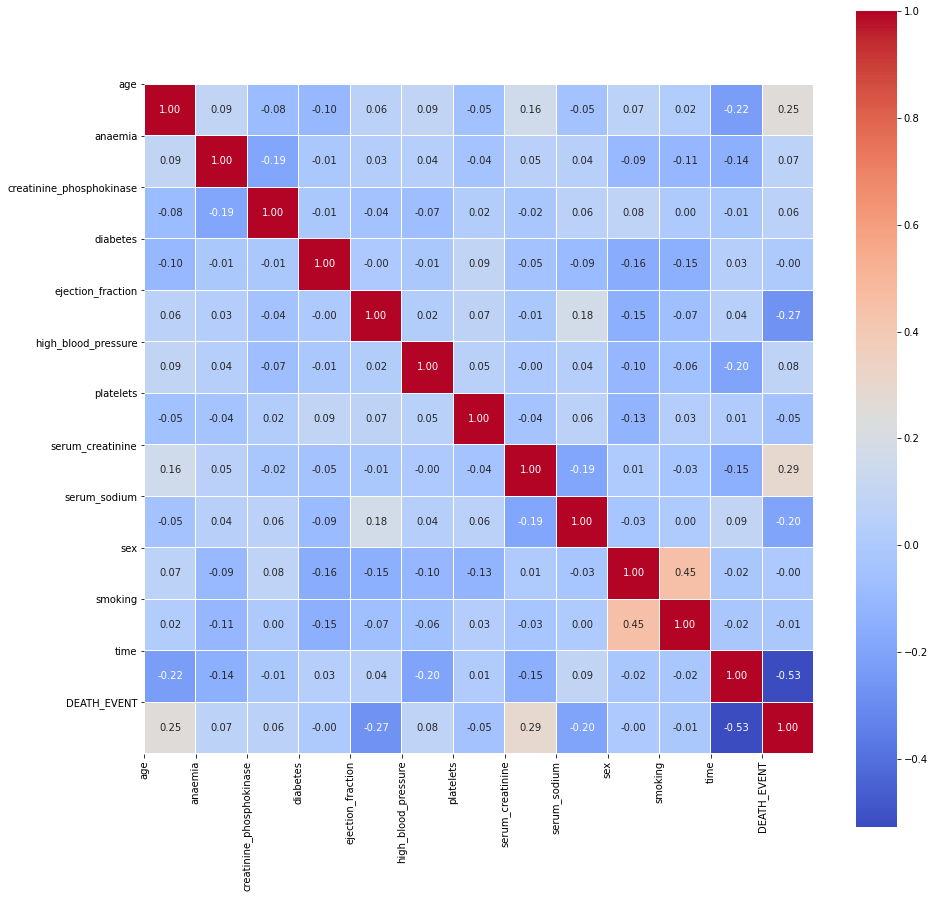

In [90]:
plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

plt.xticks(range(dataset.shape[1]), dataset.columns, rotation=90)
plt.yticks(range(dataset.shape[1]), dataset.columns)

dataset.corr()

### Loking to the plots made some insigths can be made. 

### The age is directly proportional to heart failure, and the cases observed shown that between 55 and 75 years most of the deaths registered took place. Looking to the statistical correlation betwen the death and the age, around 0.25, confirms the histogram with a positive correlation.

### Have or don't have anemia does not show any good correlation (around 0.066) to indicate if a patient will or will not have heart failure. The creatinine phosphokinase and diabetes, also do not show a good correlation (around 0.062 and -0.001 respectively). This information is very visual in the histogram and box plots, and is coroborated with de statistical correlation.

### The ejection fraction, in other hand have a negative correlation (around -0.268), so, as it increase the chance of have a heart failure decrease. 

### We can see another couple of factors that do not have a good correlation, high blood pressure, and platelets. We have to reinforce that what we are talking about here is about the data, motherless clinically a high blood pressure is an indicator of heart problem, in this dataset it appears to not have a good correlation with the chance of having a death per heart failure.

### The serum creatinine and serum sodium levels are good indicators of the occurrence of death per heart failure. The first has a positive correlation and the second a negative correlation.

### The sex does not appear to have a low correlation with the deaths registered. 

### The time shows the best correlation to the death event. But, taking into consideration that in this dataset it was a factor indicating the number of days that a patient was being monitored, this is not a good indicator to take into consideration in a machine learning model. We say that because using this data can induce a trend in the model, so, in further data, the model probably will not work well.

### Assuming what was considered in this initial analysis we will use to create the model only the data with more than 0.1 of correlation. In that case the next section we will handle the data to get only the age, ejection fraction, serum creatinine, serum sodium columns.

<a id="3"></a>
<h2 style='background:gray; border:0; color:white'><center>3. Data transformations<center><h2>

### In this part, we will not have much work to do. First, we already know that our dataset only has numerical data and does  not have missing values. So, we will not have to trouble ourselves to take care of categorical data or missing values.

### Our work here will be:
### <blockquote> 1. Separate the dataset into de dependents variables Y (that will be the Death events) and independent variables X (all other variables);</blockquote> 
### <blockquote> 2. Drop the columns that have less than 0.1 of correlation ('anaemia', 'creatinine_phosphokinase',  'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'time', 'DEATH_EVENT') in the independent variables;</blockquote> 
### <blockquote> 3. Separate the data into the training and test set;</blockquote> 
### <blockquote> 4. Make a feature scaling. This will be important because our data have many differences between the values like some columns have a maximum value of 148 and others of 9.59. It makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.</blockquote> 

In [93]:
# Taking the dependent and independet variables
X = dataset
y = dataset['DEATH_EVENT']

In [94]:
# excluding the columns that will not be used
X = X.drop(['anaemia', 'creatinine_phosphokinase', 
            'diabetes', 'high_blood_pressure', 
            'platelets', 'sex', 'smoking', 
            'DEATH_EVENT'], axis=1)

In [95]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [96]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="4"></a>
<h2 style='background:gray; border:0; color:white'><center>4. Modeling<center><h2>

### Now we will make some classification models. We will use classification algorithms because our problem addresses the occurrence or not of a death event (0 or 1). For that purpose, we will evaluate three different models using the K Neighbors classifier, support vector machine classifier, and logistic regression classifier. After that, we will evaluate the peformaçe of each one.

In [97]:
# Training the k Neighbors model on the Training set
classifier_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KN.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
# Training the Support vector machine model on the Training set
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [99]:
# Training the Logistic Regression model on the Training set
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [100]:
# Predicting the Test set results
y_pred_KN = classifier_KN.predict(X_test)
accuracies_KN = cross_val_score(estimator = classifier_KN, X = X_test, y = y_test, cv = 10)
print("Kmeans Accuracy: {:.2f} %".format(accuracies_KN.mean()*100))
print("Kmeans Standard Deviation: {:.2f} %\n".format(accuracies_KN.std()*100))

y_pred_SVM = classifier_SVM.predict(X_test)
accuracies_SVM = cross_val_score(estimator = classifier_SVM, X = X_test, y = y_test, cv = 10)
print("Support vector machine Accuracy: {:.2f} %".format(accuracies_SVM.mean()*100))
print("Support vector machine Standard Deviation: {:.2f} %\n".format(accuracies_SVM.std()*100))

y_pred_LR = classifier_LR.predict(X_test)
accuracies_LR = cross_val_score(estimator = classifier_LR, X = X_test, y = y_test, cv = 10)
print("Logistic Regression Accuracy: {:.2f} %".format(accuracies_LR.mean()*100))
print("Logistic Regression Standard Deviation: {:.2f} %".format(accuracies_LR.std()*100))

Kmeans Accuracy: 72.14 %
Kmeans Standard Deviation: 14.33 %

Support vector machine Accuracy: 81.61 %
Support vector machine Standard Deviation: 15.36 %

Logistic Regression Accuracy: 79.11 %
Logistic Regression Standard Deviation: 15.91 %


In [101]:
# Making the Confusion Matrix plot function
def plot_confusion_matrix(y_pred, y_true, title):
    cm = confusion_matrix(y_true, y_pred)
    ax= plt.subplot()
    sns.heatmap(
        cm, 
        annot=True, 
        ax=ax, 
        fmt='g'
    )
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    plt.show()

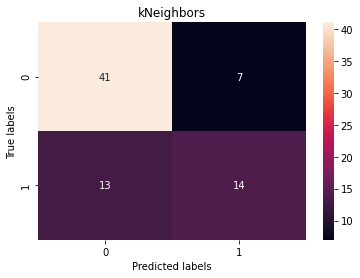

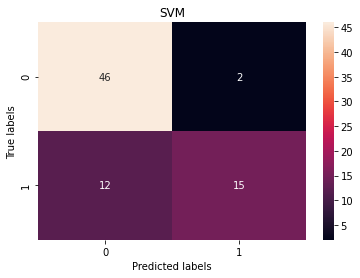

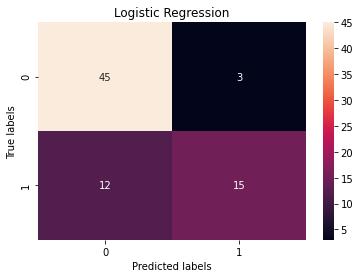

In [102]:
# ploting the Confusion Matrix
plot_confusion_matrix(y_pred_KN, y_test, 'kNeighbors')
plot_confusion_matrix(y_pred_SVM, y_test, 'SVM')
plot_confusion_matrix(y_pred_LR, y_test, 'Logistic Regression')

### Looking at the models trained we can see that both support vector machine and logistic regression had the same accuracy (72.34%), just a little bit greater than the k Neighbors model (69.29). Remember this accuracy was obtained in the test set, which is good because this data wasn't used in the model training process.
### Assuming our problem we can choose the support vector machine model to further use because that model had the lowest false-negative off all three. This is something very important when we are talking about health because is very dangerous to let someone who needs special care without it.

<a id="5"></a>
<h2 style='background:gray; border:0; color:white'><center>5. Conclusion<center><h2>

### In the end we have a model that can be really used in further data. That model can be improved with new data to training it and maybe taking another factor, like high blood pressure into account, the optimization will not be done here. 
### In the data analysis, we could see that the age, ejection fraction, serum creatinine, serum sodium column were the pieces of information with more correlation due to the death event. So, it is a good thing to do pay attention to that indicators in new patients admitted to the facility, also a regular evaluation in that indicators on the patients already in observation maybe is a good approach to reduce de risk of death.
### Looking at what we analyzed here, it is very helpful to use computing tools to analyze data in health care especially machine learning tools. So, some approaches like that could be useful in hospitals, nursing homes, life insurance companies, and other health facilities. 